### `Importing Required Libraries`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.api import ExponentialSmoothing
from matplotlib import style                      # For using the styles in visualization
plt.style.use('ggplot')
import statsmodels.api as sm
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error

### `Reading File`

In [2]:
data = pd.read_csv("C:/Users/Admin/Downloads/finally_done (2).csv")
data.head()

,reviewTime,reviewerID,product_id,reviewText,summary,rating,main_cat,title,rank_no,price,reviewerName,verified,year,month
0,2018-01-05,A2HOI48JK8838M,B00004U9V2,This handcream has a beautiful fragrance. It d...,Beautiful Fragrance,3.0,Luxury Beauty,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,4324.0,30.0,DB,True,2018,1
1,2016-08-14,A2HOI48JK8838M,B00004U9V2,There is no evidence to me that this product i...,Paying for the name,3.0,Luxury Beauty,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,4324.0,30.0,DB,True,2016,8
2,2017-04-05,A1YIPEY7HX73S7,B00004U9V2,"wonderful hand lotion, for seriously dry skin,...",wonderful hand lotion,5.0,Luxury Beauty,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,4324.0,30.0,Ajaey,True,2017,4
3,2017-03-27,A2QCGHIJ2TCLVP,B00004U9V2,"Best hand cream around. Silky, thick, soaks i...",Best hand cream around,5.0,Luxury Beauty,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,4324.0,30.0,D. Jones,True,2017,3
4,2017-02-28,A2QCGHIJ2TCLVP,B00004U9V2,Great hand lotion. Soaks right in and leaves ...,Great hand lotion!,5.0,Luxury Beauty,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,4324.0,30.0,D. Jones,True,2017,2


In [3]:
data[data.reviewTime>'2012-12-31']['reviewText'].shape[0]

20535

In [4]:
data[data.reviewTime<'2012-12-31']['reviewText'].shape[0]

732

In [5]:
data['reviewTime']=pd.to_datetime(data['reviewTime'])

In [7]:
#data.drop('Unnamed: 0',axis=1,inplace=True)

### `Splitting Data  in Positive reviews , Negative reviews , Neutral reviews`

In [9]:
data.loc[data.rating < 3 ,'Sentiment'] = 'Negative'
data.loc[data.rating > 3 ,'Sentiment'] = 'Positive'
data.loc[data.rating == 3 ,'Sentiment'] = 'Neutral'

In [10]:
Positive = data[data['Sentiment'] == 'Positive']
Positive.set_index('reviewTime',inplace=True)
Positive.head()

,reviewerID,product_id,reviewText,summary,rating,main_cat,title,rank_no,price,reviewerName,verified,year,month,Sentiment
reviewTime,,,,,,,,,,,,,,
2017-04-05,A1YIPEY7HX73S7,B00004U9V2,"wonderful hand lotion, for seriously dry skin,...",wonderful hand lotion,5.0,Luxury Beauty,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,4324.0,30.0,Ajaey,True,2017,4,Positive
2017-03-27,A2QCGHIJ2TCLVP,B00004U9V2,"Best hand cream around. Silky, thick, soaks i...",Best hand cream around,5.0,Luxury Beauty,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,4324.0,30.0,D. Jones,True,2017,3,Positive
2017-02-28,A2QCGHIJ2TCLVP,B00004U9V2,Great hand lotion. Soaks right in and leaves ...,Great hand lotion!,5.0,Luxury Beauty,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,4324.0,30.0,D. Jones,True,2017,2,Positive
2016-10-12,A2QCGHIJ2TCLVP,B00004U9V2,"'Love this stuff. Very smooth, very moisturiz...",Great stuff!,5.0,Luxury Beauty,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,4324.0,30.0,D. Jones,True,2016,10,Positive
2017-03-20,A2R4UNHFJBA6PY,B00004U9V2,Thanks!!,Five Stars,5.0,Luxury Beauty,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,4324.0,30.0,Amazon Customer,True,2017,3,Positive


In [11]:
Negative = data[data['Sentiment'] == 'Negative']
Negative.set_index('reviewTime',inplace=True)
Negative.head()

,reviewerID,product_id,reviewText,summary,rating,main_cat,title,rank_no,price,reviewerName,verified,year,month,Sentiment
reviewTime,,,,,,,,,,,,,,
2015-01-13,A18L008KVHQ1AM,B000068DWY,"I have a multitude of ""designer deodorants"" an...",That burning sensation...,1.0,Luxury Beauty,"Calvin Klein ck one Eau de Toilette, 3.4 fl. oz.",30752.0,64.0,Trump 2020,True,2015,1,Negative
2018-03-04,A3VXLOGI23ZHHX,B000142FVW,I would give this zero stars. Formula is very ...,Very disappointed for an OPI product,1.0,Luxury Beauty,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...",26115.0,8.4,Nicole M,True,2018,3,Negative
2018-01-29,A3P51JNV7DHB2L,B000142FVW,I guess I should have realized this would be y...,Great service but Ugly color,2.0,Luxury Beauty,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...",26115.0,8.4,RV Living,True,2018,1,Negative
2018-01-10,A3OP1NKCMO99U2,B000142FVW,its ok,One Star,1.0,Luxury Beauty,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...",26115.0,8.4,Amazon Customer,True,2018,1,Negative
2017-10-03,AO6XYV4ZKJ2UW,B000142FVW,I normally don't leave reviews but the polish ...,Peachy yellow mess,2.0,Luxury Beauty,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...",26115.0,8.4,TurtleLynn,True,2017,10,Negative


In [12]:
Neutral = data[data['Sentiment'] == 'Neutral']
Neutral.set_index('reviewTime',inplace=True)
Neutral.head()

,reviewerID,product_id,reviewText,summary,rating,main_cat,title,rank_no,price,reviewerName,verified,year,month,Sentiment
reviewTime,,,,,,,,,,,,,,
2018-01-05,A2HOI48JK8838M,B00004U9V2,This handcream has a beautiful fragrance. It d...,Beautiful Fragrance,3.0,Luxury Beauty,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,4324.0,30.0,DB,True,2018,1,Neutral
2016-08-14,A2HOI48JK8838M,B00004U9V2,There is no evidence to me that this product i...,Paying for the name,3.0,Luxury Beauty,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,4324.0,30.0,DB,True,2016,8,Neutral
2014-06-13,ACUGBCEADYT6D,B00004U9V2,Love the moisturizing properties of the lotion...,"I like the moisturizing properties, but the sm...",3.0,Luxury Beauty,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,4324.0,30.0,Booklass,True,2014,6,Neutral
2014-11-06,A1RRX286ZRI830,B00005V50B,I liked it but not sure it made that much of a...,I liked it but not sure it made that much of ...,3.0,Luxury Beauty,Supersmile Professional Teeth Whitening Toothp...,5522.0,23.0,Patrycja,True,2014,11,Neutral
2014-02-01,A1M1Y5UGONAW06,B00005V50B,I used Supersmile for a couple of months. I w...,Expensive and just OK toothpaste,3.0,Luxury Beauty,Supersmile Professional Teeth Whitening Toothp...,5522.0,23.0,Jody,False,2014,2,Neutral


### `Resampling of Data for positive reviews`

In [13]:
Positive_resemple = Positive['price'].resample('m').sum()
Positive_resemple

reviewTime
2005-09-30        7.500
2005-10-31        0.000
2005-11-30        0.000
2005-12-31        0.000
2006-01-31        0.000
                ...    
2018-05-31    13216.310
2018-06-30     4887.125
2018-07-31     4155.200
2018-08-31     2757.155
2018-09-30      516.450
Freq: M, Name: price, Length: 157, dtype: float64

In [14]:
Positive_resemple=Positive_resemple[Positive_resemple.index>'2002-01-01']

In [15]:
Positive_resemple

reviewTime
2005-09-30        7.500
2005-10-31        0.000
2005-11-30        0.000
2005-12-31        0.000
2006-01-31        0.000
                ...    
2018-05-31    13216.310
2018-06-30     4887.125
2018-07-31     4155.200
2018-08-31     2757.155
2018-09-30      516.450
Freq: M, Name: price, Length: 157, dtype: float64

### `Decomposition chart for the Positive reviews Data`

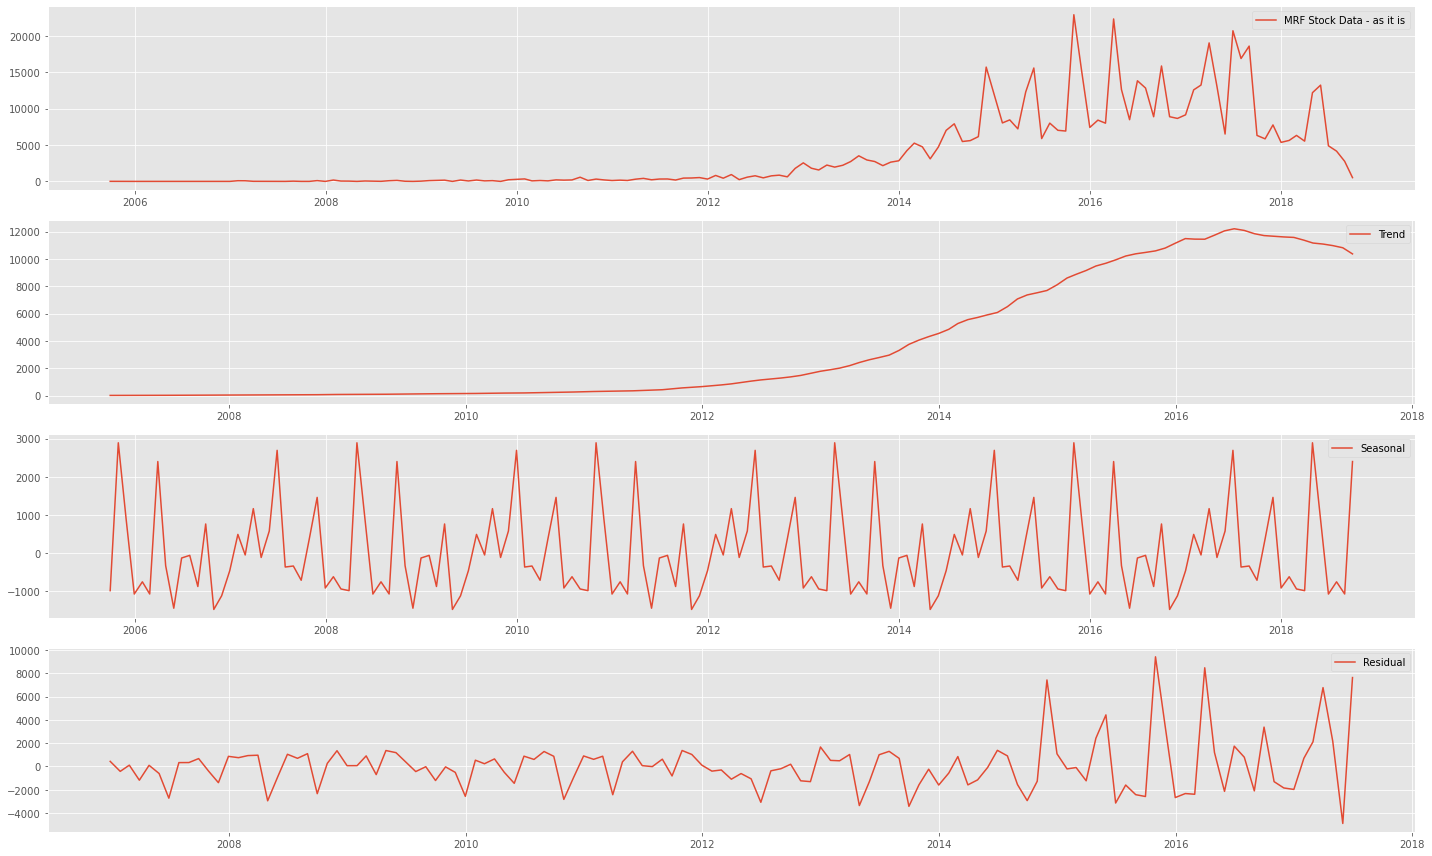

In [16]:
decomposition=seasonal_decompose(Positive_resemple, period=30)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

# plotting all the 4 graphs
fig,ax = plt.subplots(4,1,figsize=(20,12))

plt.subplot(411)
plt.plot(Positive_resemple,label='MRF Stock Data - as it is')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')

plt.tight_layout()

##### In the decomposition graph we can see that there is a increasing trend in total sales after 2011 and also the seasonality is present that means repeatation of total sales in between specific time period over the years

### `ADF test to check the stationarity of data`

In [17]:
def checkStationarity(data):
    pvalue = adfuller(data)[1]
    if(pvalue>0.05):
        msg = 'p-value={}. Data is not stationary'.format(pvalue)
    else:
        msg='p-value={}. Data is stationary'.format(pvalue)
        
    return(msg)

In [18]:
checkStationarity(Positive_resemple)

'p-value=0.5781132507564734. Data is not stationary'

#### Here we can see that our Data is not stationary i.e. data don't have constant mean and constant variance over the time so for further processing we have to make data stationary so we can accurately do the statistical analysis.

### `Differencing method : subtracts the current value from the previous value .`

In [19]:
shift1 = Positive_resemple - Positive_resemple.shift(8)
checkStationarity(shift1.dropna())

'p-value=0.9432277702856181. Data is not stationary'

In [20]:
Stationary_positive = shift1.dropna()

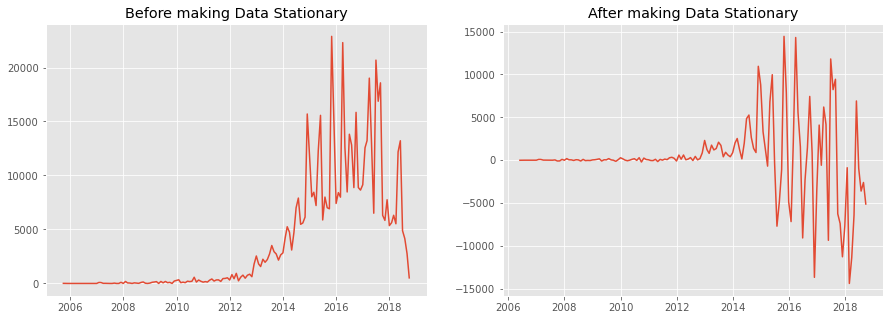

In [21]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax[0].plot(Positive_resemple)
ax[0].set_title('Before making Data Stationary')
ax[1].plot(Stationary_positive)
ax[1].set_title('After making Data Stationary')
plt.show()

### `ACF PACF Plot`

##### Just with a quick look over the left graph it’s easy to determine the time series is not stationary. The average value changes over time and the peaks in the seasonal periods seem to get only larger.
##### We can see over the right graph that after doing the smoothening of data change in the average value is not changing much and seasonal peaks over the time has been decreased and trend component is not longer in data

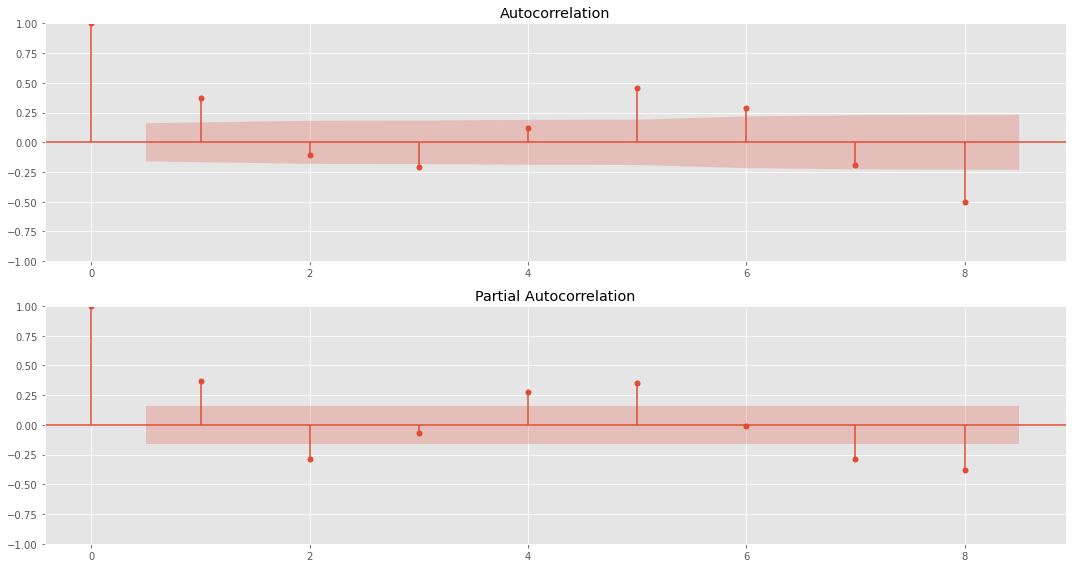

In [22]:
fig = plt.figure(figsize=(15,8))


ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(Stationary_positive, lags=8, ax=ax1)


# Show PACF
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(Stationary_positive, lags=8, ax=ax2)
plt.tight_layout()

### `Train test split`

In [23]:
Eighty = int(0.9 * len(Positive_resemple))

train = Positive_resemple.iloc[:Eighty]
test = Positive_resemple.iloc[Eighty:]
print("train = {}, test = {}".format(len(train), len(test)))

train = 141, test = 16


In [24]:
for p in range(1,9):
    for q in range(1,9):
        m1 = ARIMA(Stationary_positive,order=(p,0,q))
        r1 = m1.fit()
        print(f'\nfor AR{p,0,q} AIC score is {r1.aic} .')


for AR(1, 0, 1) AIC score is 2890.815101627364 .

for AR(1, 0, 2) AIC score is 2892.529744063716 .

for AR(1, 0, 3) AIC score is 2891.629502123341 .

for AR(1, 0, 4) AIC score is 2883.4920566025567 .

for AR(1, 0, 5) AIC score is 2876.3435043911722 .

for AR(1, 0, 6) AIC score is 2878.719219406843 .

for AR(1, 0, 7) AIC score is 2875.9950898003954 .

for AR(1, 0, 8) AIC score is 2853.7706413774613 .

for AR(2, 0, 1) AIC score is 2887.0943961063763 .

for AR(2, 0, 2) AIC score is 2854.478139614184 .

for AR(2, 0, 3) AIC score is 2849.7983846547368 .

for AR(2, 0, 4) AIC score is 2848.9939315709007 .

for AR(2, 0, 5) AIC score is 2820.7400272141194 .

for AR(2, 0, 6) AIC score is 2824.79705539797 .

for AR(2, 0, 7) AIC score is 2829.2361013893487 .

for AR(2, 0, 8) AIC score is 2832.132330883809 .

for AR(3, 0, 1) AIC score is 2887.4400244395174 .

for AR(3, 0, 2) AIC score is 2844.8714900678783 .

for AR(3, 0, 3) AIC score is 2844.309850714 .

for AR(3, 0, 4) AIC score is 2830.30196513

##### AR(8,0,8) model giving the lowest AIC score thats we choose these parameters for further model training

### ` ARMA Model for the Positive reviews`

In [25]:
p=8; q=8
model = ARIMA(train,order=(p,0,q))
result = model.fit()
#print(result.summary())

### `Prediction`

In [22]:
start = len(train)
end = len(train)+len(test)-1
pred = result.predict(start=start,end=end)

### `Plotting Actual and Predicted`

<AxesSubplot:xlabel='reviewTime'>

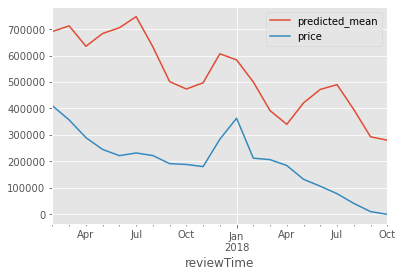

In [23]:
pred.plot(legend=True)
test.plot(legend=True)

### -- Model is predicting near to the actual values but not the exact values and predictin values following the pattern of actual values

### `Evaluation :`

In [24]:
mse = mean_squared_error(pred,test)
print('Mean squarred error for ARMA model is : ',round(mse,2))
print('\nRoot Mean squarred error for ARMA model is : ',np.sqrt(round(mse,2)))

Mean squarred error for ARMA model is :  115614735026.83

Root Mean squarred error for ARMA model is :  340021.66846662876


### `ARIMA model`

In [25]:
for p in range(1,10):
    for q in range(1,10):
        m1 = ARIMA(Stationary_positive,order=(p,8,q))
        r1 = m1.fit()
        print(f'\nfor AR{p,8,q} AIC score is {r1.aic} .')


for AR(1, 8, 1) AIC score is 5860.73020381495 .

for AR(1, 8, 2) AIC score is 5863.059561796566 .

for AR(1, 8, 3) AIC score is 5891.032132180802 .

for AR(1, 8, 4) AIC score is 5817.971726566904 .

for AR(1, 8, 5) AIC score is 5839.33115443054 .

for AR(1, 8, 6) AIC score is 5894.874247241052 .

for AR(1, 8, 7) AIC score is 5894.851567310762 .

for AR(1, 8, 8) AIC score is 5901.601101303398 .

for AR(1, 8, 9) AIC score is 5892.3340484776045 .

for AR(2, 8, 1) AIC score is 5654.33180116859 .

for AR(2, 8, 2) AIC score is 5641.179631467861 .

for AR(2, 8, 3) AIC score is 5657.455469956558 .

for AR(2, 8, 4) AIC score is 5605.1653849945415 .

for AR(2, 8, 5) AIC score is 5645.081190650877 .

for AR(2, 8, 6) AIC score is 5675.065768850081 .

for AR(2, 8, 7) AIC score is 5681.224001051831 .

for AR(2, 8, 8) AIC score is 5672.58112688785 .

for AR(2, 8, 9) AIC score is 5635.043753060575 .

for AR(3, 8, 1) AIC score is 5605.915663415239 .

for AR(3, 8, 2) AIC score is 5542.371541611814 .

f

### ARIMA(9,8,9) Model giving the lowest AIC score 

In [26]:
p=9; q=9
model = ARIMA(train,order=(p,8,q))
result = model.fit()

print('AIC value for ARIMA model is :',result.aic)

AIC value for ARIMA model is : 4539.9469538748035


### `Prediction :`

In [27]:
pred = result.predict(start=start,end=end)

<AxesSubplot:xlabel='reviewTime'>

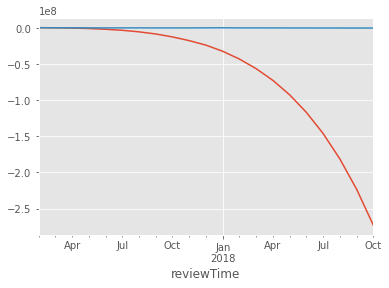

In [28]:
pred.plot()
test.plot()

### `Evaluation :`

In [29]:
mse = mean_squared_error(pred,test)
print('Mean squarred error for ARMA model is : ',round(mse,2))
print('\nRoot Mean squarred error for ARMA model is : ',np.sqrt(round(mse,2)))

Mean squarred error for ARMA model is :  1.0175775757061036e+16

Root Mean squarred error for ARMA model is :  100875050.22086005


### `SARIMA MODEL`

In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

m = SARIMAX(train, order=(8,0,8), seasonal_order=(8,0,8,12)).fit()

### `Predictions`

In [31]:
pred=m.predict(len(train),((len(train)+len(test)-1)))

In [32]:
SARIMA = pd.DataFrame({'Actual':test,
                     'Predicted':pred,
                     'Error':test-pred})
SARIMA

,Actual,Predicted,Error
2017-02-28,410128.542330,586106.508740,-175977.966411
2017-03-31,356584.999153,509739.060515,-153154.061362
2017-04-30,289711.924664,446731.594436,-157019.669772
2017-05-31,245035.642133,439953.113253,-194917.471121
2017-06-30,221784.937954,412556.749727,-190771.811773
2017-07-31,231920.403707,426152.196019,-194231.792312
2017-08-31,222159.797620,413022.695686,-190862.898066
2017-09-30,191519.934636,364301.579128,-172781.644492
2017-10-31,188497.077190,373784.962932,-185287.885742
2017-11-30,180331.117094,409423.950124,-229092.833031


### `Evaluation :`

In [33]:
err=np.sqrt(mean_squared_error(test,pred))
print('RMSE:',err)

RMSE: 250532.3468750898


### Actual and Predicted Plot

<AxesSubplot:>

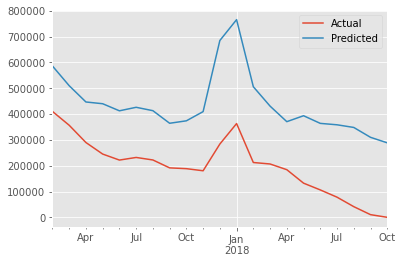

In [34]:
SARIMA[['Actual','Predicted']].plot()

### LJung Box Test

In [35]:
pvalue = sm.stats.acorr_ljungbox(m.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


##### --- `Model is predicting near to the actual values but not the exact values and predicted values following the pattern of actual values`

### SARIMA model giving the best predictions with compare to the other models as it have low RMSE value and the predicted values are following the actual values path and closed to it

### `Forecasting  future values :`

In [36]:
start = 202
end = 214
future =m.predict(start=start,end=end)
future

2018-11-30    303722.463918
2018-12-31    626856.492597
2019-01-31    624990.824423
2019-02-28    418493.367504
2019-03-31    364007.809944
2019-04-30    321924.738082
2019-05-31    334784.249547
2019-06-30    307958.351339
2019-07-31    302058.733892
2019-08-31    282260.977597
2019-09-30    243752.214436
2019-10-31    240914.069804
2019-11-30    262887.913983
Freq: M, Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='reviewTime'>

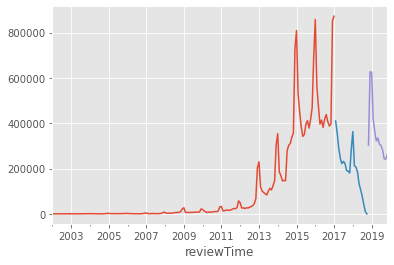

In [37]:
train.plot()
test.plot()
future.plot()

### `Resempling for Negative reviews Data`

In [38]:
Negative_resemple = Negative['price'].resample('m').sum()
Negative_resemple[Negative_resemple==0]

reviewTime
2001-07-31    0.0
2001-09-30    0.0
2001-11-30    0.0
2002-03-31    0.0
2002-04-30    0.0
2002-08-31    0.0
2002-09-30    0.0
2002-10-31    0.0
2003-04-30    0.0
2003-05-31    0.0
2003-06-30    0.0
2003-09-30    0.0
2004-01-31    0.0
2004-02-29    0.0
2004-04-30    0.0
2004-06-30    0.0
2004-09-30    0.0
2005-08-31    0.0
2006-05-31    0.0
2006-09-30    0.0
2007-07-31    0.0
Name: price, dtype: float64

In [39]:
Negative_resemple=Negative_resemple[Negative_resemple.index>='2008-01-01']
Negative_resemple

reviewTime
2008-01-31      305.046444
2008-02-29       78.086444
2008-03-31      133.213222
2008-04-30      110.726444
2008-05-31      183.750000
                  ...     
2018-05-31    11349.809881
2018-06-30     7886.705776
2018-07-31     6418.728998
2018-08-31     3615.585776
2018-09-30     1248.145776
Freq: M, Name: price, Length: 129, dtype: float64

### Decomposition graph for Negative reviews

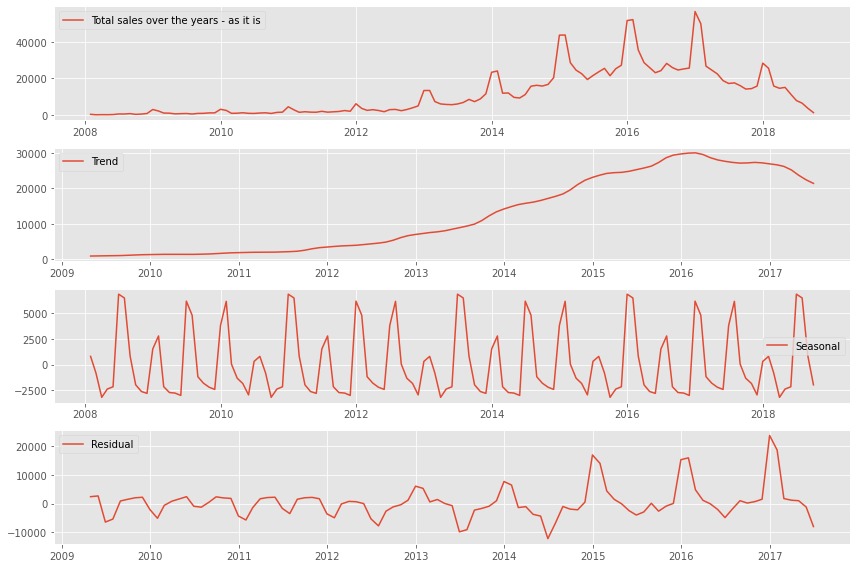

In [40]:
decomposition=seasonal_decompose(Negative_resemple, period=30)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

# plotting all the 4 graphs
fig,ax = plt.subplots(4,1,figsize=(12,8))

plt.subplot(411)
plt.plot(Negative_resemple,label='Total sales over the years - as it is')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')

plt.tight_layout()

### ADF Stationary test :

In [41]:
checkStationarity(Negative_resemple)

'p-value=0.5834498459388873. Data is not stationary'

### Rolling average to make data stationary

In [42]:
Stationary_negative = Negative_resemple.rolling(window=12).mean().dropna()
Stationary_negative

reviewTime
2008-12-31      578.287424
2009-01-31      729.610239
2009-02-28      807.087655
2009-03-31      873.851470
2009-04-30      912.197812
                  ...     
2018-05-31    17185.779722
2018-06-30    16405.775510
2018-07-31    15475.814982
2018-08-31    14438.328354
2018-09-30    13359.335780
Freq: M, Name: price, Length: 118, dtype: float64

In [43]:
checkStationarity(Stationary_negative)

'p-value=0.033645792706925255. Data is stationary'

### Data Plot before Data stationary and after

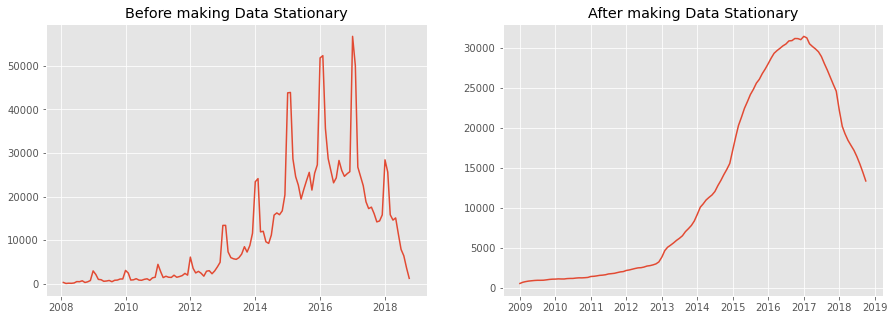

In [44]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax[0].plot(Negative_resemple)
ax[0].set_title('Before making Data Stationary')
ax[1].plot(Stationary_negative)
ax[1].set_title('After making Data Stationary')
plt.show()

###  ACF PACF plot :

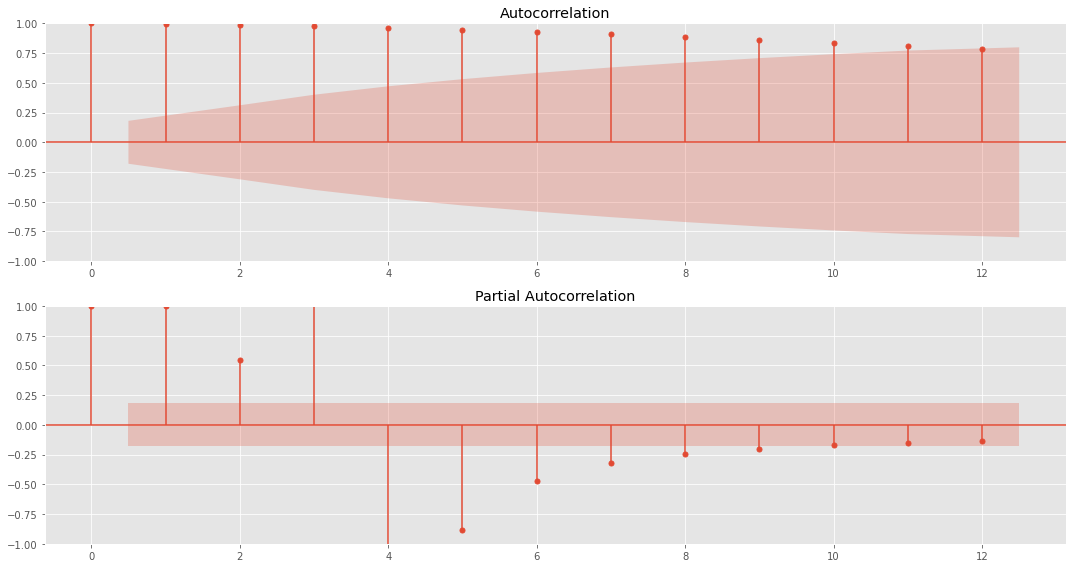

In [45]:
fig = plt.figure(figsize=(15,8))


ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(Stationary_negative, lags=12, ax=ax1)


# Show PACF
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(Stationary_negative, lags=12, ax=ax2)
plt.tight_layout()

### `Splitting into train test`

In [46]:
Eighty = int(0.9 * len(Negative_resemple))

train = Negative_resemple.iloc[:Eighty]
test = Negative_resemple.iloc[Eighty:]
print("train = {}, test = {}".format(len(train), len(test)))

train = 116, test = 13


### `Finding best parameters for ARMA Model `

In [47]:
for p in range(1,5):
    for q in range(1,12):
        m1 = ARIMA(Stationary_negative,order=(p,0,q))
        r1 = m1.fit()
        print(f'\nfor AR{p,0,q} AIC score is {r1.aic} .')


for AR(1, 0, 1) AIC score is 1756.2547283221188 .

for AR(1, 0, 2) AIC score is 1722.9979309490639 .

for AR(1, 0, 3) AIC score is 1701.8241293860563 .

for AR(1, 0, 4) AIC score is 1690.9424403955015 .

for AR(1, 0, 5) AIC score is 1693.1325098172206 .

for AR(1, 0, 6) AIC score is 1685.286479462501 .

for AR(1, 0, 7) AIC score is 1689.3016086611203 .

for AR(1, 0, 8) AIC score is 1715.319248987011 .

for AR(1, 0, 9) AIC score is 1701.603247508524 .

for AR(1, 0, 10) AIC score is 1673.6171012539398 .

for AR(1, 0, 11) AIC score is 1707.77611934609 .

for AR(2, 0, 1) AIC score is 1661.194013583552 .

for AR(2, 0, 2) AIC score is 1650.1169174556837 .

for AR(2, 0, 3) AIC score is 1652.0442993126194 .

for AR(2, 0, 4) AIC score is 1653.6551797636837 .

for AR(2, 0, 5) AIC score is 1691.9722436278537 .

for AR(2, 0, 6) AIC score is 1656.6228857427807 .

for AR(2, 0, 7) AIC score is 1658.5030154068659 .

for AR(2, 0, 8) AIC score is 1661.2903104732302 .

for AR(2, 0, 9) AIC score is 1661.

In [48]:
p=2;q=2
model = ARIMA(train,order=(p,0,q))
result = model.fit()
result.aic

2325.8990150951504

### `Prediction  :`

In [49]:
start = len(train)
end =  len(train)+len(test)-1
pred = result.predict(start=start,end=end)

In [50]:
DF_ARMA = pd.DataFrame({
    'Actual':test,
    'Predicted':pred,
    'Error':test-pred
})
DF_ARMA

,Actual,Predicted,Error
2017-09-30,14196.056659,17677.190736,-3481.134077
2017-10-31,14417.299547,20175.107038,-5757.807491
2017-11-30,15792.889213,20804.579720,-5011.690507
2017-12-31,28425.364870,20884.757402,7540.607468
2018-01-31,25614.368545,20804.606235,4809.762310
2018-02-28,15830.617661,20678.799322,-4848.181661
2018-03-31,14606.553437,20541.126269,-5934.572832
2018-04-30,15105.959881,20401.526040,-5295.566159
2018-05-31,11349.809881,20262.904883,-8913.095002
2018-06-30,7886.705776,20126.095611,-12239.389836


<AxesSubplot:>

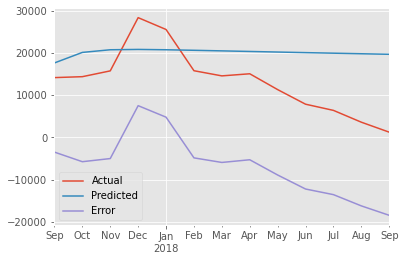

In [51]:
DF_ARMA.plot()

In [52]:
mse = mean_squared_error(pred,test)
print('RMSE :',np.sqrt(mse))

RMSE : 9829.121052509827


###  ` ARIMA Model`

In [53]:
for p in range(1,5):
    for q in range(1,12):
        m1 = ARIMA(Stationary_negative,order=(p,12,q))
        r1 = m1.fit()
        print(f'\nfor AR{p,12,q} AIC score is {r1.aic} .')


for AR(1, 12, 1) AIC score is 2474.586385037059 .

for AR(1, 12, 2) AIC score is 2353.2843851915695 .

for AR(1, 12, 3) AIC score is 2235.459551321402 .

for AR(1, 12, 4) AIC score is 2258.6534266935314 .

for AR(1, 12, 5) AIC score is 2236.0956181495867 .

for AR(1, 12, 6) AIC score is 2398.3935275600757 .

for AR(1, 12, 7) AIC score is 2459.7196547578046 .

for AR(1, 12, 8) AIC score is 2451.552868086986 .

for AR(1, 12, 9) AIC score is 2460.751974153782 .

for AR(1, 12, 10) AIC score is 2496.4620682946565 .

for AR(1, 12, 11) AIC score is 2495.692706494962 .

for AR(2, 12, 1) AIC score is 2363.7149232113443 .

for AR(2, 12, 2) AIC score is 2246.7716163960795 .

for AR(2, 12, 3) AIC score is 2144.4621983504535 .

for AR(2, 12, 4) AIC score is 2036.0104175636534 .

for AR(2, 12, 5) AIC score is 2077.4231460189835 .

for AR(2, 12, 6) AIC score is 2330.1258661813154 .

for AR(2, 12, 7) AIC score is 2335.2235997205375 .

for AR(2, 12, 8) AIC score is 2311.5667160148305 .

for AR(2, 12, 

In [54]:
p=2;d=12;q=4
model = ARIMA(train,order = (p,d,q))
result = model.fit()
result.aic

3047.4910856057854

### `Prediction : `

In [55]:
pred = result.predict(start=start,end=end)

In [56]:
DF_ARIMA = pd.DataFrame({
    'Actual':test,
    'Predicted':pred,
    'Error':test-pred
})
DF_ARIMA

,Actual,Predicted,Error
2017-09-30,14196.056659,-1.645389e+05,1.787349e+05
2017-10-31,14417.299547,-1.150865e+06,1.165282e+06
2017-11-30,15792.889213,-4.637736e+06,4.653529e+06
2017-12-31,28425.364870,-1.452117e+07,1.454960e+07
2018-01-31,25614.368545,-3.877899e+07,3.880461e+07
2018-02-28,15830.617661,-9.256202e+07,9.257785e+07
2018-03-31,14606.553437,-2.029304e+08,2.029450e+08
2018-04-30,15105.959881,-4.159404e+08,4.159555e+08
2018-05-31,11349.809881,-8.069378e+08,8.069492e+08
2018-06-30,7886.705776,-1.495100e+09,1.495108e+09


In [57]:
mse = mean_squared_error(pred,test)
print('RMSE :',(np.sqrt(mse)))

RMSE : 2631881347.6979003


### `SARMA Model`

In [58]:
m = SARIMAX(train, order=(2,0,2), seasonal_order=(2,0,2,36)).fit()
pred=m.predict(len(train),((len(train)+len(test)-1)))

### `Prediction :`

In [59]:
DF_SARMA = pd.DataFrame({
    'Actual':test,
    'Predicted':pred,
    'Error':test-pred
})
DF_SARMA

,Actual,Predicted,Error
2017-09-30,14196.056659,17883.635811,-3687.579152
2017-10-31,14417.299547,20482.551213,-6065.251666
2017-11-30,15792.889213,22929.519178,-7136.629965
2017-12-31,28425.364870,34830.744070,-6405.379200
2018-01-31,25614.368545,34879.999382,-9265.630837
2018-02-28,15830.617661,26885.230225,-11054.612564
2018-03-31,14606.553437,24548.695743,-9942.142306
2018-04-30,15105.959881,23369.471833,-8263.511952
2018-05-31,11349.809881,21557.622881,-10207.813000
2018-06-30,7886.705776,22431.411281,-14544.705505


In [60]:
err=np.sqrt(mean_squared_error(test,pred))
print('RMSE:',err)

RMSE: 12281.87754814529


<AxesSubplot:>

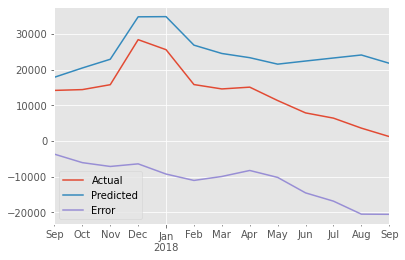

In [61]:
DF_SARMA.plot()

### --In case of Negative reviews total sales forecasting over the years SARIMA model doing the better forecastimg in compare to other  models

### `Predicting future values :`

In [62]:
start = 129
end = 141
future =m.predict(start=start,end=end)
future

2018-10-31    23581.631772
2018-11-30    24339.202636
2018-12-31    36388.933705
2019-01-31    36479.567715
2019-02-28    28012.069814
2019-03-31    24335.675373
2019-04-30    22772.813840
2019-05-31    21157.674618
2019-06-30    21563.429373
2019-07-31    23431.258281
2019-08-31    21999.217868
2019-09-30    21220.620560
2019-10-31    21301.315840
Freq: M, Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='reviewTime'>

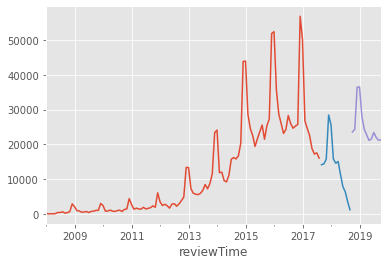

In [63]:
train.plot()
test.plot()
future.plot()

### ` Resempling for neutral reviews`

In [64]:
Neutral_resemple = Neutral['price'].resample('m').sum()

In [65]:
Neutral_resemple[Neutral_resemple==0]

reviewTime
2000-06-30    0.0
2000-07-31    0.0
2000-08-31    0.0
2000-09-30    0.0
2000-10-31    0.0
2000-12-31    0.0
2001-01-31    0.0
2001-02-28    0.0
2001-03-31    0.0
2001-05-31    0.0
2001-07-31    0.0
2001-08-31    0.0
2001-11-30    0.0
2001-12-31    0.0
2002-01-31    0.0
2002-02-28    0.0
2002-03-31    0.0
2002-05-31    0.0
2002-10-31    0.0
2003-01-31    0.0
2003-02-28    0.0
2003-05-31    0.0
2003-11-30    0.0
2004-03-31    0.0
2004-05-31    0.0
2004-06-30    0.0
2005-02-28    0.0
2006-07-31    0.0
2006-08-31    0.0
Name: price, dtype: float64

In [66]:
Neutral_resemple = Neutral_resemple[Neutral_resemple.index>'2007-01-01']
Neutral_resemple

reviewTime
2007-01-31      712.065776
2007-02-28      114.173222
2007-03-31      221.999666
2007-04-30      109.509666
2007-05-31       84.543222
                  ...     
2018-05-31    10997.144105
2018-06-30     8570.327661
2018-07-31     5445.595442
2018-08-31     2802.516444
2018-09-30      938.943222
Freq: M, Name: price, Length: 141, dtype: float64

### Decomposition plot for Neutral reviews Data

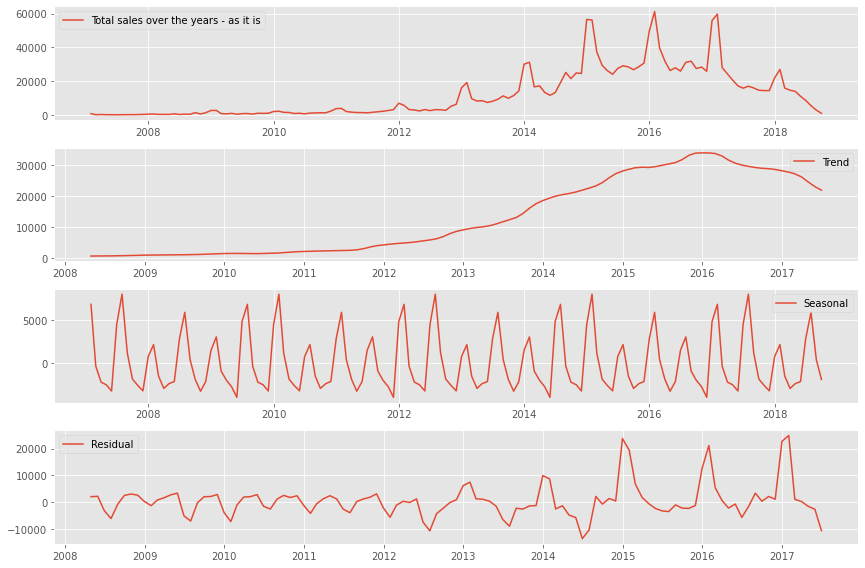

In [67]:
decomposition=seasonal_decompose(Neutral_resemple, period=30)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

# plotting all the 4 graphs
fig,ax = plt.subplots(4,1,figsize=(12,8))

plt.subplot(411)
plt.plot(Neutral_resemple,label='Total sales over the years - as it is')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')

plt.tight_layout()

### Here we can see that the data have increasing trend after 2010 and as well as seasonality after every 2 years

### `ADF Test for stationarity check`

In [68]:
checkStationarity(Neutral_resemple)

'p-value=0.5589388671765584. Data is not stationary'

### `Rolling average for making data stationary :`

In [69]:
Stationary_neutral=Stationary_negative = Neutral_resemple.rolling(window=15).mean().dropna()
Stationary_neutral

reviewTime
2008-03-31      239.287044
2008-04-30      207.301970
2008-05-31      241.580592
2008-06-30      243.929925
2008-07-31      262.926784
                  ...     
2018-05-31    17211.447916
2018-06-30    16165.003584
2018-07-31    15154.913940
2018-08-31    14196.787563
2018-09-30    13206.210993
Freq: M, Name: price, Length: 127, dtype: float64

In [70]:
checkStationarity(Stationary_neutral.dropna())

'p-value=0.016189913043735318. Data is stationary'

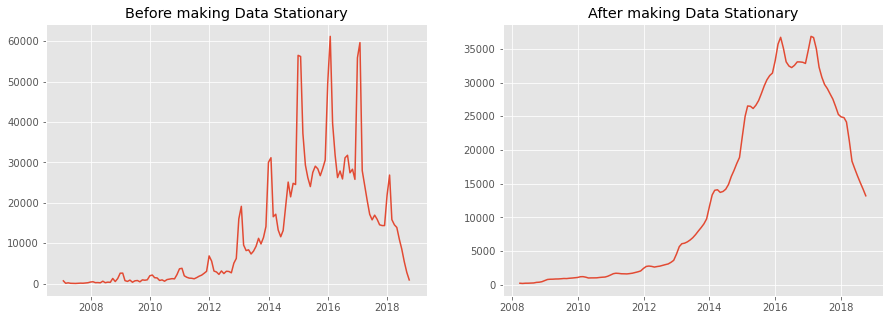

In [71]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax[0].plot(Neutral_resemple)
ax[0].set_title('Before making Data Stationary')
ax[1].plot(Stationary_neutral)
ax[1].set_title('After making Data Stationary')
plt.show()

### `ACF PACF plot for Neutral reviews data `

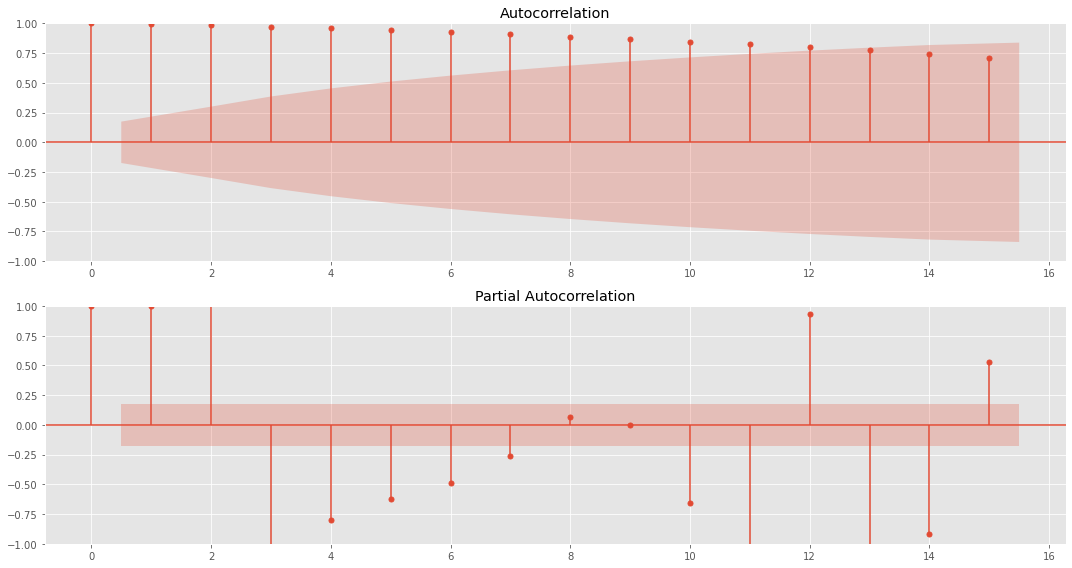

In [72]:
fig = plt.figure(figsize=(15,8))


ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(Stationary_neutral, lags=15, ax=ax1)


# Show PACF
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(Stationary_neutral, lags=15, ax=ax2)
plt.tight_layout()

### `Splitting the data`

In [73]:
Eighty = int(0.9 * len(Neutral_resemple))

train = Neutral_resemple.iloc[:Eighty]
test = Neutral_resemple.iloc[Eighty:]
print("train = {}, test = {}".format(len(train), len(test)))

train = 126, test = 15


In [74]:
for p in range(1,8):
    for q in range(1,13):
        model = ARIMA(Stationary_neutral,order=(p,0,q))
        result = model.fit()
        print(f'for {(p,0,q)} aic score is {result.aic}')

for (1, 0, 1) aic score is 2004.1735339343563
for (1, 0, 2) aic score is 1976.8328739650083
for (1, 0, 3) aic score is 1965.4645815605077
for (1, 0, 4) aic score is 1962.3168959030559
for (1, 0, 5) aic score is 1963.451334979546
for (1, 0, 6) aic score is 1967.736440543715
for (1, 0, 7) aic score is 1966.7940617917207
for (1, 0, 8) aic score is 2043.2679086727546
for (1, 0, 9) aic score is 1971.3708373359927
for (1, 0, 10) aic score is 2005.7707196593437
for (1, 0, 11) aic score is 2054.2583085234214
for (1, 0, 12) aic score is 2065.03933326604
for (2, 0, 1) aic score is 1976.016551573024
for (2, 0, 2) aic score is 1972.8320378992555
for (2, 0, 3) aic score is 1965.8818642068165
for (2, 0, 4) aic score is 1963.5667736406979
for (2, 0, 5) aic score is 1948.249676535836
for (2, 0, 6) aic score is 1970.3480306381252
for (2, 0, 7) aic score is 1962.0585678545342
for (2, 0, 8) aic score is 1982.8465316629747
for (2, 0, 9) aic score is 1986.106408981025
for (2, 0, 10) aic score is 1988.33506

### `ARMA Model :`

In [75]:
p=7;q=9
model = ARIMA(train,order=(p,0,q))
result = model.fit()
result.aic

2548.0654467553627

### `Prediction :`

In [76]:
start = len(train)
end = len(train)+len(test)-1
pred=result.predict(start=start,end=end)

In [77]:
DF_ARMA = pd.DataFrame({
    'Actual':test,
    'Predicted':pred,
    'Error':test-pred
})
DF_ARMA

,Actual,Predicted,Error
2017-07-31,16962.316659,15504.672454,1457.644205
2017-08-31,15923.699547,14434.693081,1489.006466
2017-09-30,14575.033771,20829.146362,-6254.112590
2017-10-31,14382.475991,22169.356834,-7786.880843
2017-11-30,14379.882769,23190.427939,-8810.545170
2017-12-31,21895.895323,34623.701979,-12727.806656
2018-01-31,26872.463986,28673.372686,-1800.908700
2018-02-28,15853.922435,24338.982620,-8485.060185
2018-03-31,14577.726993,23620.788668,-9043.061675
2018-04-30,13915.220549,14265.612247,-350.391698


### `Actual vs predicted :`

<AxesSubplot:>

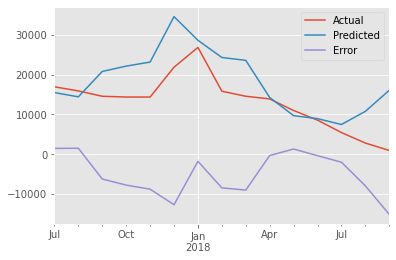

In [78]:
DF_ARMA.plot()

### `Evaluation :`

In [79]:
err=np.sqrt(mean_squared_error(test,pred))
print('RMSE:',err)

RMSE: 7301.149142442185


### `ARIMA Model`

In [80]:
for p in range(1,3):
    for q in range(1,13):
        model = ARIMA(Stationary_neutral,order=(p,15,q))
        result = model.fit()
        print(f'for {(p,15,q)} aic score is {result.aic}')

for (1, 15, 1) aic score is 3169.370316773731
for (1, 15, 2) aic score is 3147.6782470524704
for (1, 15, 3) aic score is 3123.957685123606
for (1, 15, 4) aic score is 3139.8122801580603
for (1, 15, 5) aic score is 3136.218873415927
for (1, 15, 6) aic score is 3144.558140549637
for (1, 15, 7) aic score is 3134.8810650348305
for (1, 15, 8) aic score is 3132.7155037574003
for (1, 15, 9) aic score is 3151.6824382344903
for (1, 15, 10) aic score is 3161.7398824695692
for (1, 15, 11) aic score is 3167.8757674826984
for (1, 15, 12) aic score is 3176.101172049645
for (2, 15, 1) aic score is 2910.3070224719204
for (2, 15, 2) aic score is 2842.4085513452646
for (2, 15, 3) aic score is 2744.516949541348
for (2, 15, 4) aic score is 2826.878483467497
for (2, 15, 5) aic score is 2801.03535034789
for (2, 15, 6) aic score is 2817.374974720315
for (2, 15, 7) aic score is 2813.0262387626344
for (2, 15, 8) aic score is 2820.3103640409136
for (2, 15, 9) aic score is 2856.63770822488
for (2, 15, 10) aic sc

In [81]:
p=2;q=3;d=15
model = ARIMA(train,order=(p,d,q))
result = model.fit()
result.aic

3520.077990596366

### `Prediction :`

In [82]:
pred=result.predict(start=start,end=end)

In [83]:
DF_ARIMA = pd.DataFrame({
    'Actual':test,
    'Predicted':pred,
    'Error':test-pred
})
DF_ARIMA

,Actual,Predicted,Error
2017-07-31,16962.316659,-2.113082e+06,2.130045e+06
2017-08-31,15923.699547,-2.439418e+07,2.441011e+07
2017-09-30,14575.033771,-1.498928e+08,1.499073e+08
2017-10-31,14382.475991,-6.630816e+08,6.630960e+08
2017-11-30,14379.882769,-2.373219e+09,2.373234e+09
2017-12-31,21895.895323,-7.301073e+09,7.301095e+09
2018-01-31,26872.463986,-2.002406e+10,2.002409e+10
2018-02-28,15853.922435,-5.014891e+10,5.014893e+10
2018-03-31,14577.726993,-1.166320e+11,1.166320e+11
2018-04-30,13915.220549,-2.550179e+11,2.550179e+11


In [84]:
mse = mean_squared_error(pred,test)
np.sqrt(mse)

2040199364475.3967

### `SARIMA Model`

In [85]:
model = SARIMAX(train,order=(7,0,9),seasonal_order=(7,0,9,24))
result = model.fit()
result.aic

2562.120939844954

### `Evaluation :`

In [86]:
pred=result.predict(start=start,end=end)

In [87]:
DF_SARMA = pd.DataFrame({
    'Actual':test,
    'Predicted':pred,
    'Error':test-pred
})
DF_SARMA

,Actual,Predicted,Error
2017-07-31,16962.316659,16534.297767,428.018892
2017-08-31,15923.699547,14278.586029,1645.113518
2017-09-30,14575.033771,12292.489218,2282.544553
2017-10-31,14382.475991,11401.711995,2980.763996
2017-11-30,14379.882769,13549.810138,830.072631
2017-12-31,21895.895323,34383.706345,-12487.811022
2018-01-31,26872.463986,39553.500384,-12681.036398
2018-02-28,15853.922435,19515.759180,-3661.836745
2018-03-31,14577.726993,17971.594337,-3393.867344
2018-04-30,13915.220549,15276.181299,-1360.960750


### `Actual vs predicted :`

<AxesSubplot:>

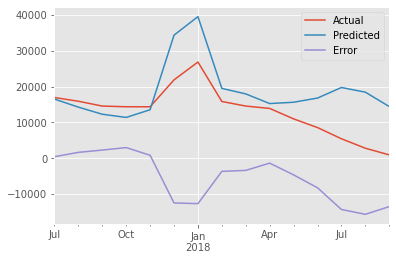

In [88]:
DF_SARMA.plot()

### `Evaluation :`

In [89]:
err=np.sqrt(mean_squared_error(test,pred))
print('RMSE:',err)

RMSE: 8497.472064639504


### SARIMA model doing the better forecasting of total sales over the years for Neutral reviews data

### `Future values forecasting :`

In [90]:
start = 141
end = 153
future =result.predict(start=start,end=end)
future

2018-10-31    14529.580942
2018-11-30    15943.952195
2018-12-31    33245.572058
2019-01-31    34094.439611
2019-02-28    14957.814136
2019-03-31    12921.419983
2019-04-30    10243.912075
2019-05-31     9272.921484
2019-06-30     8325.134282
2019-07-31     8395.007149
2019-08-31     6237.805945
2019-09-30     4662.488272
2019-10-31     4664.095119
Freq: M, Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='reviewTime'>

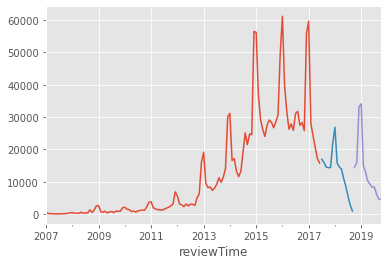

In [91]:
train.plot();
test.plot();
future.plot();